# Elevated-Plus Maze Analysis

In [1]:
from analysis import analysis_utils as au
from analysis import resampling as rs
from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from scipy import stats
import seaborn as sns
import SigProc
import sys

In [2]:
%matplotlib inline
InteractiveShell.ast_node_interactivity = "all"

In [3]:
sns.set_style("darkgrid")

In [4]:
mouse_directory = os.path.expanduser("~") + "/Hen_Lab/Mice/EPM"

if not os.path.exists(mouse_directory):
    print("The mouse directory does not exist", file=sys.stderr)

file_num = 0
raw_files = list()
for dir_name, subdir_list, file_list in os.walk(mouse_directory):
    for file_name in file_list:
        if file_name.endswith(".csv"):
            print("{}. full path of: {} is: {}".format(file_num, file_name, dir_name+"/"+file_name))
            file_num += 1
            raw_files.append(dir_name+"/"+file_name)

0. full path of: behavior_drd87.csv is: /Users/saveliyyusufov/Hen_Lab/Mice/EPM/drd87/behavior_drd87.csv
1. full path of: Raw_EPM_drd87.csv is: /Users/saveliyyusufov/Hen_Lab/Mice/EPM/drd87/Raw_EPM_drd87.csv
2. full path of: Raw_EPM_drd73.csv is: /Users/saveliyyusufov/Hen_Lab/Mice/EPM/drd73/Raw_EPM_drd73.csv
3. full path of: behavior_drd73.csv is: /Users/saveliyyusufov/Hen_Lab/Mice/EPM/drd73/behavior_drd73.csv
4. full path of: Raw_EPM_drd77.csv is: /Users/saveliyyusufov/Hen_Lab/Mice/EPM/drd77/Raw_EPM_drd77.csv
5. full path of: behavior_drd77.csv is: /Users/saveliyyusufov/Hen_Lab/Mice/EPM/drd77/behavior_drd77.csv
6. full path of: behavior_drd46.csv is: /Users/saveliyyusufov/Hen_Lab/Mice/EPM/drd46/behavior_drd46.csv
7. full path of: Raw_EPM_drd46.csv is: /Users/saveliyyusufov/Hen_Lab/Mice/EPM/drd46/Raw_EPM_drd46.csv


In [5]:
data = pd.read_csv(raw_files[1], header=None)
_, AUC_dataframe, cell_transients_dataframe = SigProc.detect_ca_transients_mossy(data, 2, 0.5, 0.2, 10)

In [ ]:
au.neuron_line_plot(AUC_dataframe, "neuron6")

In [31]:
behavior_column_names = ['Trial_time', 'Recording_time', 'X_center', 'Y_center', 'Area', 'Areachange', 
                         'Elongation', 'Distance_moved', 'Velocity', 'Arena_centerpoint',
                         'Open1_centerpoint', 'Open2_centerpoint',
                         'Closed1_centerpoint', 'Closed2_centerpoint',
                         'OpenArms_centerpoint', 'ClosedArms_centerpoint', 'Result_1']

behavior_df = pd.read_csv(raw_files[0], header=None)
behavior_df.columns = behavior_column_names
behavior_df = au.downsample_dataframe(behavior_df, 3)

# Define what constitutes as a running frame
VELOCITY_CUTOFF = 4;

# Adds "Running_frames" column to the end of the behavior Dataframe 
behavior_df["Running_frames"] = np.where(behavior_df["Velocity"] > VELOCITY_CUTOFF, 1, 0)

In [8]:
neuron_concated_behavior = AUC_dataframe.join(behavior_df, how="left")

In [38]:
real_diff_df = au.set_real_diff_df(neuron_concated_behavior, AUC_dataframe, "OpenArms_centerpoint", "ClosedArms_centerpoint")
real_diff_df

,neuron1,neuron2,neuron3,neuron4,neuron5,neuron6,neuron7,neuron8,neuron9,neuron10,...,neuron60,neuron61,neuron62,neuron63,neuron64,neuron65,neuron66,neuron67,neuron68,neuron69
d,-4.19561,6.9537,5.86234,12.2911,7.6943,-1.0277,1.02405,-0.860894,-3.20938,2.44695,...,9.97405,-1.6101,6.50104,0.434317,5.00547,9.15386,5.86696,0.973809,-1.97104,13.037


In [10]:
resampled_df = rs.shuffle(10000, neuron_concated_behavior, AUC_dataframe, "OpenArms_centerpoint", "ClosedArms_centerpoint")

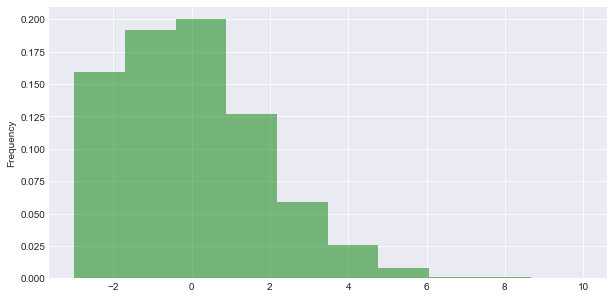

In [68]:
plt.figure(figsize=(10,5));
resampled_df["neuron27"].plot.hist(alpha=0.5, color='g', density=True);

In [70]:
plt.figure(fontsize=15)
resampled_df.hist(alpha=0.5, color='g', density=True, figsize=(70, 50));

TypeError: __init__() got an unexpected keyword argument 'fontsize'

In [46]:
classified_neurons = rs.classify_neurons_non_parametrically(AUC_dataframe, resampled_df, real_diff_df, p_value=0.125, threshold=10)

In [47]:
classified_neurons

{'neuron6': 'unclassified',
 'neuron15': 'unclassified',
 'neuron19': 'unclassified',
 'neuron28': 'unclassified',
 'neuron59': 'unclassified',
 'neuron60': 'unclassified',
 'neuron1': 'not-selective',
 'neuron2': 'selective',
 'neuron3': 'selective',
 'neuron4': 'selective',
 'neuron5': 'selective',
 'neuron7': 'not-selective',
 'neuron8': 'not-selective',
 'neuron9': 'not-selective',
 'neuron10': 'not-selective',
 'neuron11': 'selective',
 'neuron12': 'not-selective',
 'neuron13': 'selective',
 'neuron14': 'not-selective',
 'neuron16': 'selective',
 'neuron17': 'selective',
 'neuron18': 'selective',
 'neuron20': 'not-selective',
 'neuron21': 'not-selective',
 'neuron22': 'selective',
 'neuron23': 'not-selective',
 'neuron24': 'not-selective',
 'neuron25': 'selective',
 'neuron26': 'selective',
 'neuron27': 'selective',
 'neuron29': 'selective',
 'neuron30': 'not-selective',
 'neuron31': 'selective',
 'neuron32': 'selective',
 'neuron33': 'selective',
 'neuron34': 'selective',
 'neuro

In [ ]:
rs.classify_neurons_parametrically(AUC_dataframe, resampled_df, real_diff_df, "OpenArms", 87.5, 5, threshold=10)

In [23]:
def activity_by_neurons(concated_df, neuron_names, *behaviors, frame_rate=10):
    """Computes the neuron activity rates for given behaviors
    
    This function computes the rates for a given animal's activity and  
    neuron, given some set of behaviors.

    Args: 
        concated_df: a concatenated pandas DataFrame of the neuron activity and 
        the corresponding behavior, for a given animal.
        neuron_names: the names of the neurons whose rates are to be computed.
        behaviors: a list of the behaviors for which to compute the activity rates. 
        frame_rate: the framerate to multiply the rate by, default is 10.

    Returns: 
        activity_df: a pandas DataFrame of the neuron activity rates.
    """
    activity_df = pd.DataFrame(columns=behaviors)
    
    for behavior in behaviors:
        if behavior in concated_df.columns:
            activity_df.loc[:, behavior] = frame_rate * concated_df.loc[concated_df[behavior] != 0, neuron_names].mean()
        elif '&' in behavior:
            beh1 = behavior.split('&')[0]
            beh2 = behavior.split('&')[1]
            activity_df.loc[:, behavior] = frame_rate * concated_df.loc[(concated_df[beh1] != 0) & ((concated_df[beh2] != 0)), neuron_names].mean()
        elif '|' in behavior:
            beh1 = behavior.split('|')[0]
            beh2 = behavior.split('|')[1]
            activity_df.loc[:, behavior] = frame_rate * concated_df.loc[(concated_df[beh1] != 0) | ((concated_df[beh2] != 0)), neuron_names].mean()

    return activity_df

In [24]:
activity_rates_df = activity_by_neurons(neuron_concated_behavior, AUC_dataframe.columns, "ClosedArms_centerpoint", "OpenArms_centerpoint", "OpenArms_centerpoint&Running_frames", "ClosedArms_centerpoint&Running_frames", "Running_frames")

## Plot scatterplot of neurons, where $x$-axis is the closedarms rate, $y$-axis is the openarms rate, and the entire scatterplot is bisected by the line $y=x$

In [37]:
activity_rates_df

,ClosedArms_centerpoint,OpenArms_centerpoint,OpenArms_centerpoint&Running_frames,ClosedArms_centerpoint&Running_frames,Running_frames
neuron1,4.195613,0.000000,0.000000,7.062691,4.820956
neuron2,0.660295,7.613999,20.115586,1.664502,4.188008
neuron3,0.428045,6.290385,15.465597,1.202086,5.619741
neuron4,0.198974,12.490077,25.567573,0.000000,3.853954
neuron5,0.279768,7.974064,8.993148,0.000000,2.383207
neuron6,1.439856,0.412154,0.508257,5.565445,3.276788
neuron7,1.735112,2.759157,0.000000,5.120013,3.074982
neuron8,1.203971,0.343077,0.906383,1.001087,2.249582
neuron9,4.517985,1.308601,1.086437,11.975758,7.050148
neuron10,0.264186,2.711132,0.000000,0.519312,2.105495


In [36]:
import plotly
import plotly.graph_objs as go

# Create traces

# Plot selective neurons
trace0 = go.Scatter(
    x = [activity_rates_df.loc[neuron, "OpenArms_centerpoint"] for neuron in classified_neurons if classified_neurons[neuron] == "selective"],
    y = [activity_rates_df.loc[neuron, "ClosedArms_centerpoint"] for neuron in classified_neurons if classified_neurons[neuron] == "selective"],
    text = [neuron for neuron in classified_neurons if classified_neurons[neuron] == "selective"],
    mode = "markers",
    name = "selective",
    marker = dict(
        color = 'rgb(255, 10, 193)'
    )
)

# Plot not-selective neurons
trace1 = go.Scatter(
    x = [activity_rates_df.loc[neuron, "OpenArms_centerpoint"] for neuron in classified_neurons if classified_neurons[neuron] == "not-selective"],
    y = [activity_rates_df.loc[neuron, "ClosedArms_centerpoint"] for neuron in classified_neurons if classified_neurons[neuron] == "not-selective"],
    text = [neuron for neuron in classified_neurons if classified_neurons[neuron] == "not-selective"],
    mode = "markers",
    name = "not-selective",
    marker = dict(
        color = 'rgb(105, 105, 105)'
    )
)

# Plot unclassified neurons
trace2 = go.Scatter(
    x = [activity_rates_df.loc[neuron, "OpenArms_centerpoint"] for neuron in classified_neurons if classified_neurons[neuron] == "unclassified"],
    y = [activity_rates_df.loc[neuron, "ClosedArms_centerpoint"] for neuron in classified_neurons if classified_neurons[neuron] == "unclassified"],
    text = [neuron for neuron in classified_neurons if classified_neurons[neuron] == "unclassified"],
    mode = "markers",
    name = "unclassified",
    marker = dict(
        color = "rgb(255, 69, 0)"
    )
)

# Plot y=x line
trace3 = go.Scatter(
    x = np.linspace(0, max(activity_rates_df["OpenArms_centerpoint"].max(), activity_rates_df["ClosedArms_centerpoint"].max())),
    y = np.linspace(0, max(activity_rates_df["OpenArms_centerpoint"].max(), activity_rates_df["ClosedArms_centerpoint"].max())),
    mode = 'lines',
    name = 'y=x'
)

data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
    width=500,
    height=500,
    title="Open-arms neuron rates vs Closed-arms neuron rates",
)
fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig)

In [39]:
labels = ["selective", "non-selective", "unclassified"]
values = [sum(1 for classification in classified_neurons.values() if classification == "selective")]
values.append(sum(1 for classification in classified_neurons.values() if classification == "not-selective"))
values.append(sum(1 for classification in classified_neurons.values() if classification == "unclassified"))

trace = go.Pie(labels=labels, values=values)

plotly.offline.iplot([trace])

In [27]:
def behavior_by_time(concated_df, behavior):
    """Split dataframe by time and behavior
    
    Args: 
        concated_df: a concatenated pandas DataFrame of the neuron activity and 
        the corresponding behavior, for a given animal.
        behavior: the specific behavior for which to generate the time intervaled dataframes 
    
    Returns: 
        time_bins: a dictionary of each intervaled dataframe
    """
    
    # Create copy of the dataframe for a certain behavior
    time_binned_df = concated_df.loc[concated_df[behavior] != 0].copy()
    time_binned_df.reset_index(drop=True, inplace=True)
    
    # Add a column of the trial time in the form of time deltas
    x = pd.to_timedelta('0.1s')
    time_binned_df.loc[:, "TIME"] = pd.Series(x*i for i in (time_binned_df.index))
    
    # Group the dataframe by 1 minute intervals
    grouped = time_binned_df.set_index("TIME").groupby(pd.Grouper(freq="1Min"))
    
    # Place each dataframe that contains the data for every 1 minute intervals into a dictionary
    time_bins = {}
    minute = 0
    for name, group in grouped:
        time_bins[minute] = grouped.get_group(name)
        minute += 1
        
    return time_bins

In [ ]:
time_binned_dfs = behavior_by_time(neuron_concated_behavior, "OpenArms_centerpoint")
time_binned_dfs[0]